## KNN (K-Nearest Neighbors)

### Topic 1: Lazy Learning & Distance Metrics
🔹 What is KNN?

KNN (K-Nearest Neighbors) is a simple algorithm:
👉 To predict something for a new point, just look at its neighbors in the training data.

It’s like saying: “Tell me who your neighbors are, and I’ll guess who you are.”

🔹 Lazy Learning

KNN is called lazy learning because:

It doesn’t really “train” a model.

It just stores the training data.

When a new data point comes, it looks at nearby neighbors and makes a decision.

👉 Real-life analogy:

A student who never studies (lazy), but keeps all books.

During the exam, instead of remembering answers, he flips through the books and copies answers from similar questions.

That’s lazy learning!

🔹 Distance Metrics

To decide who the “nearest neighbors” are, KNN measures distance.

Common distance metrics:

Euclidean distance (straight line) → most common.

d= Sqrt[ (x1−y1)^2+(x2−y2)^2 ]


Manhattan distance (like city blocks, up/down/left/right).

Minkowski distance (general form).

👉 Real-life analogy:

Imagine you want to find the closest grocery store.

Euclidean = flying straight in a line like a bird 🐦.

Manhattan = walking along roads in a grid (like New York City).

✅ In short:

Lazy learning → no training, just use data directly.

Distance metrics → how we measure closeness between points.

### Topic 2: Choosing k (number of neighbors)

🔹 What is “k” in KNN?

k = number of nearest neighbors we look at to make a prediction.

Example: If k=3 → Look at the 3 closest points and use majority vote for classification.

🏏 Real-life analogy:

Imagine you move to a new city and don’t know which cricket team people support (CSK, MI, RCB).

If you ask 1 neighbor (k=1) → maybe he’s an RCB fan. You guess “RCB.”

If you ask 3 neighbors (k=3) → 2 say “CSK,” 1 says “RCB.” You guess “CSK.”

If you ask 7 neighbors (k=7) → whichever team is in majority, you go with that.

🔹 Effect of different k values:

k=1 (too small)

Very sensitive to noise (if your closest neighbor is weird, you’ll get wrong prediction).

May overfit.

Large k

More stable, less noisy.

But too large k can oversimplify (like always guessing the majority class).

Rule of thumb

Choose odd k (3, 5, 7…) to avoid ties.

Often, √N (square root of number of data points) is a good starting point.

✅ Example:

Suppose we want to predict if a student passes or fails based on hours studied.

If k=1 → We just copy what the closest student did.

If k=5 → We check 5 nearby students → take the majority.

👉 In short:

Small k → more flexible, but risk of noise/overfitting.

Large k → smoother, but may underfit.

Best k = balance between the two.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target   # features and target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create KNN model (k=3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy with k=3:", round(acc, 3))

# Try different k values
for k in [1, 3, 5, 7, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"k={k}, Accuracy={accuracy_score(y_test, y_pred):.3f}")


Accuracy with k=3: 1.0
k=1, Accuracy=1.000
k=3, Accuracy=1.000
k=5, Accuracy=1.000
k=7, Accuracy=1.000
k=9, Accuracy=1.000


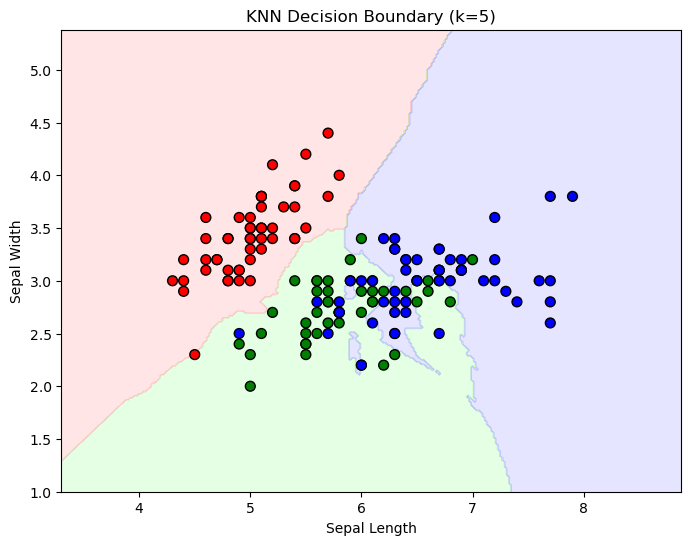

In [5]:
### Just illustratio not important
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # use only 2 features (sepal length & width)
y = iris.target

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colors for 3 classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(cmap_bold))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KNN Decision Boundary (k=5)")
plt.show()


### In short:

Use Decision Trees for simplicity & interpretability.

Use Random Forests for best accuracy & robustness.

Use KNN when dataset is small, patterns are local, and you want flexible decision boundaries.